In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

%matplotlib inline
weight_by_length = False

ox.__version__

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shape

'1.3.0'

In [9]:
# define the study sites as label : query
places = {
    "Saint Petersburg, Russia": "Saint Petersburg, Russia",
    "Moscow, Russia": "Moscow, Russia",
}

In [7]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((30.04334 59.76418, 30.04382 59.76239...",60.090737,59.744148,30.567166,30.043343,298134622,relation,421007,59.938732,30.316229,"Saint Petersburg, Northwestern Federal Distric...",place,city,1.033213
1,"MULTIPOLYGON (((37.37055 55.78805, 37.36999 55...",55.957772,55.491308,37.967428,37.290502,298455038,relation,2555133,55.750446,37.617494,"Moscow, Central Federal District, Russia",place,city,1.010819


2023-03-19 00:39:05 Moscow, Russia
2023-03-19 00:40:19 Saint Petersburg, Russia


FileNotFoundError: [Errno 2] No such file or directory: 'images/street-orientations.png'

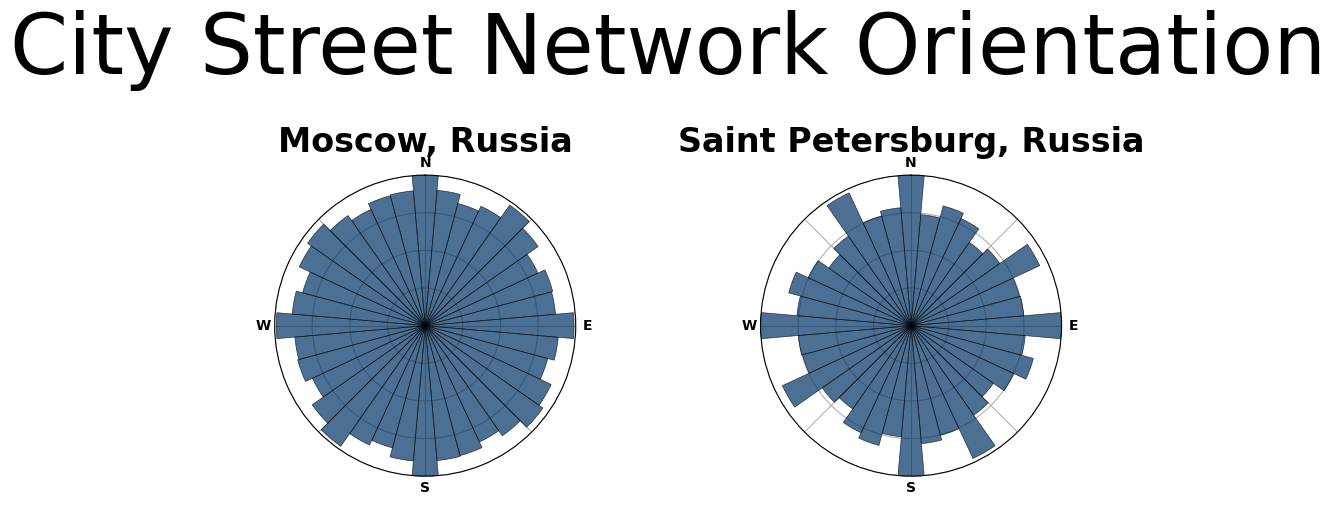

In [10]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    fig, ax = ox.bearing.plot_orientation(Gu, ax=ax, title=place, area=True)

# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig("images/street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")
plt.close()